In [259]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,553.0,977.0,400.31912,562.67110,404.95688,...,1075.6592,533.5369,-45.318967,-44.965699,-45.724640,-45.371082,787.5,1216.5,872.5,1132.5
1,2,13,img_2,766.5,1279.0,779.5,1263.0,628.63520,853.44150,636.84656,...,1075.6592,533.5369,-80.865582,-81.058877,-81.381218,-81.594101,1040.0,1397.0,1061.5,1264.0
2,3,13,img_3,1098.0,1389.0,1113.5,1372.5,965.78076,963.85480,975.10920,...,1075.6592,533.5369,-112.082651,-112.521870,-112.468086,-112.970047,1335.0,1408.0,1278.5,1272.0
3,4,13,img_4,1514.0,1196.5,1530.0,1183.5,1384.80680,766.92880,1393.20030,...,1075.6592,533.5369,-151.987874,-152.078318,-152.130371,-152.306992,1060.0,854.0,749.0,689.0
4,5,13,img_5,1514.5,398.5,1527.0,392.0,1378.65440,-43.00896,1383.22790,...,1075.6592,533.5369,132.190351,132.707685,131.770874,132.289185,749.0,1265.0,857.5,1148.0


In [260]:
x = df[['target_x_undist', 'target_y_undist','angle_undist']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=df['target_aruco'])

# Linear regressor

In [262]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [263]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

353.25616349339583 0.8821413737000436


Text(0.5, 1.0, 'true vs predicted')

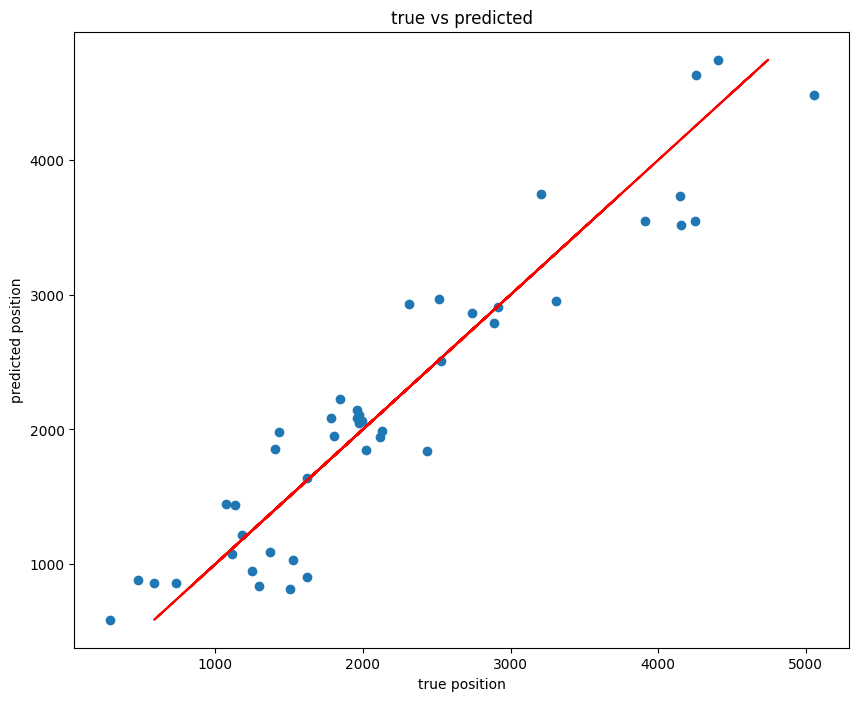

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Quadratic regressor

In [265]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [266]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

190.29666366052257 0.9341361185100789


Text(0.5, 1.0, 'true vs predicted')

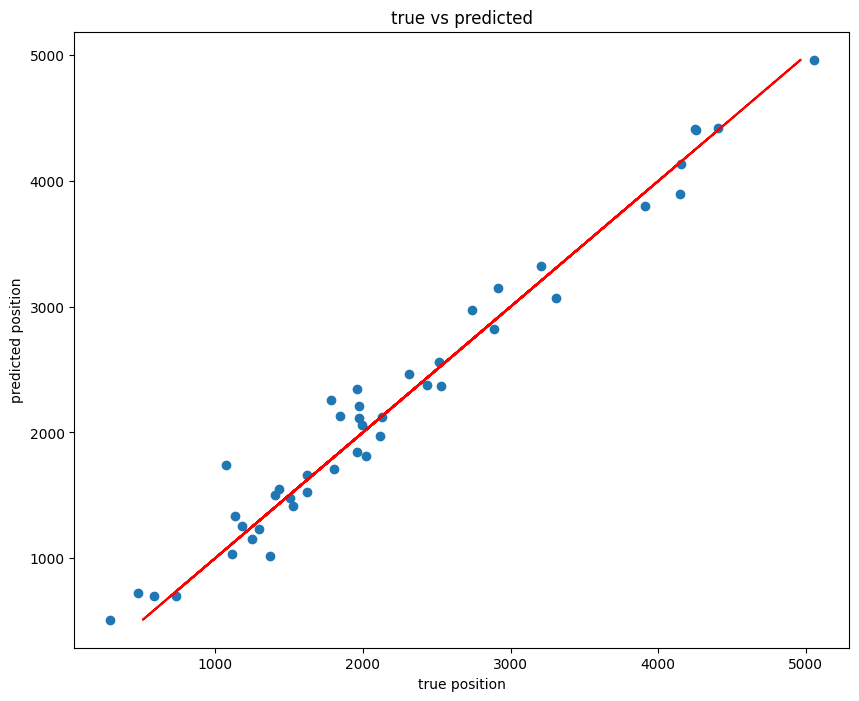

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Cubic regressor

In [268]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [269]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

103.65274296078772 0.9899423767941353


Text(0.5, 1.0, 'true vs predicted')

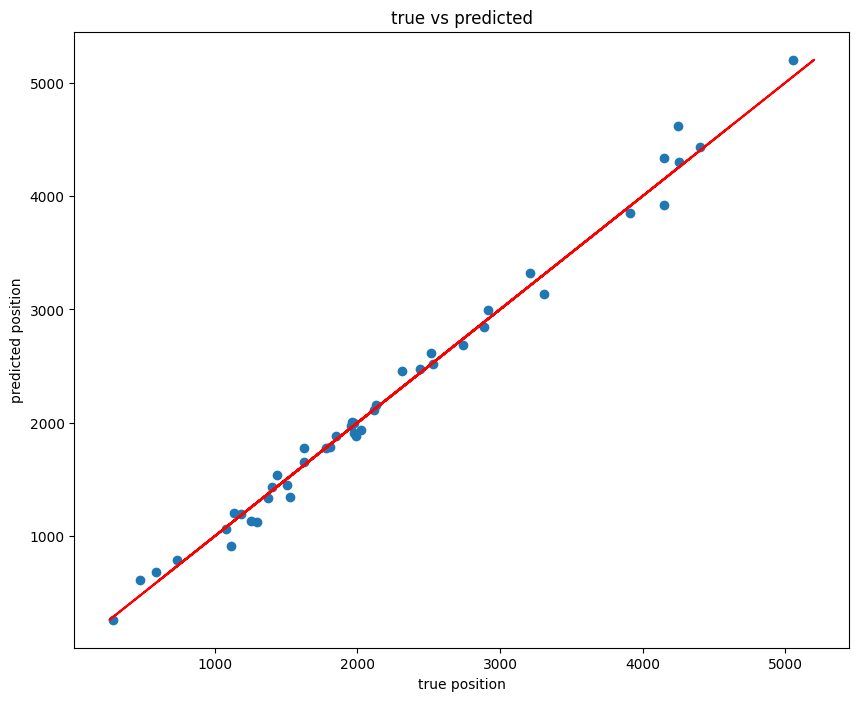

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Random forest

In [271]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

230.09007002162437 0.9440645900697768


# MLP regressor

In [272]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=100, alpha=0.000005, max_iter=100000,tol=1e-10,solver='adam')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

224.12440758203252 0.9473067125330771


# Analytic calibration

In [273]:
from pool.calibration import CameraCalibration
calib=CameraCalibration()
l_carriage_pred=[]
a=9.085e-01  
b=3.445e+00 
d1=-5.332e-02  
d2=1.218e+00  
h=9.279e+00         

for index, row in df.iterrows():

    target=row[['target_x_undist','target_y_undist']].values
    angle=row[['angle_undist']].values[0]
    carriage_pred = calib.predict_carriage_position_in_image_plane(target, angle, (a,b,d1,d2,h))
    l_carriage_pred.append(carriage_pred)

y_true=df[['carriage_x_undist','carriage_y_undist']].values
y_pred=np.array(l_carriage_pred)

In [274]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_true,y_pred,squared=False),r2_score(y_true,y_pred))

27.655526894887814 0.9990310458129276


Text(0.5, 1.0, 'true vs predicted')

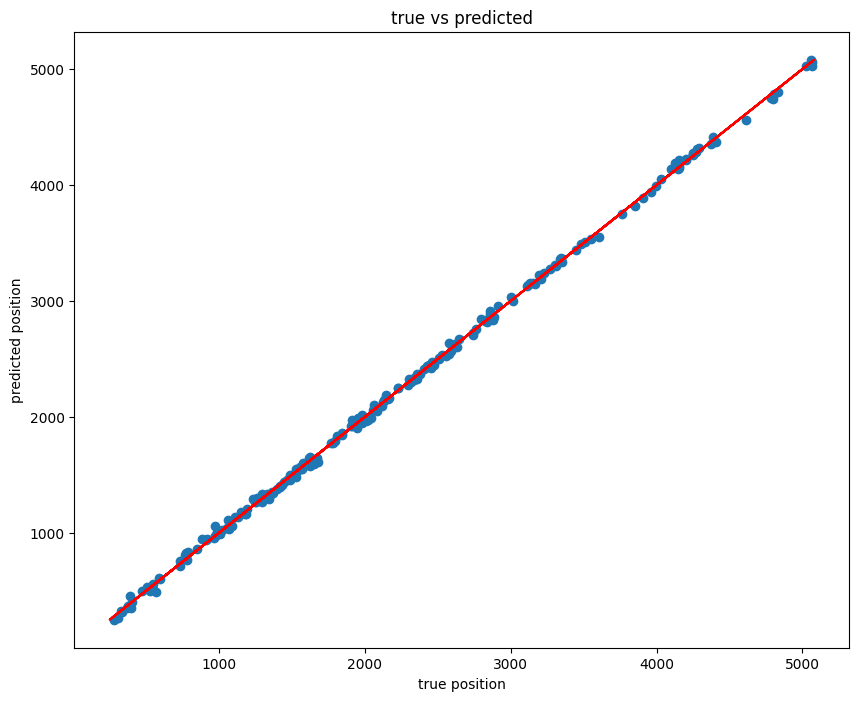

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_true,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

In [276]:
df_error=pd.DataFrame({'pred_x':y_pred[:,0],
                       'pred_y':y_pred[:,1],
                       'real_x':y_true[:,0],
                       'real_y':y_true[:,1],
                       'target_aruco': df['target_aruco'],
                       'angle': df['angle_undist']})
df_error['error_x']=y_pred[:,0]-y_true[:,0]
df_error['error_y']=y_pred[:,1]-y_true[:,1]
df_error['error']=np.sqrt(df_error['error_x'].values**2+df_error['error_y'].values**2)
cx=5184/2
cy=3456/2
center=np.array([cx,cy])
distance_from_center=np.linalg.norm(center-df_error[['real_x','real_y']], axis=1)
bins = np.arange(0,3500,500)
distance_from_center_discrete = np.digitize(distance_from_center, bins)
df_error['distance_from_center']=distance_from_center
df_error['distance_from_center_discrete']=distance_from_center_discrete

In [277]:
mean_error=np.mean(df_error['error'])
std_error=np.std(df_error['error'])
rmse=np.sqrt(np.sum(df_error['error']**2)/df_error['error'].shape[0])
print(mean_error, rmse, std_error)

35.23250596021314 39.13849780216858 17.043841526307986


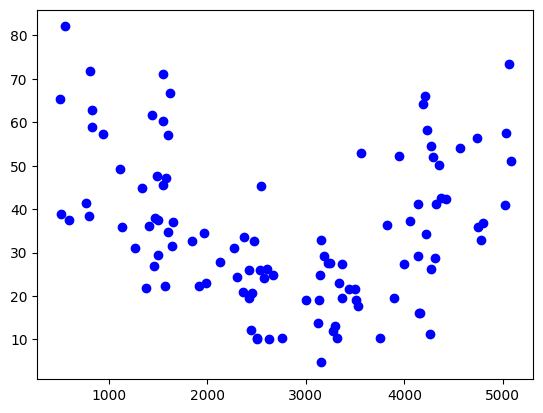

In [278]:
x_axis=df_error['pred_x']
y_axis=df_error['error']
plt.scatter(x_axis,y_axis, color='b')
plt.show()

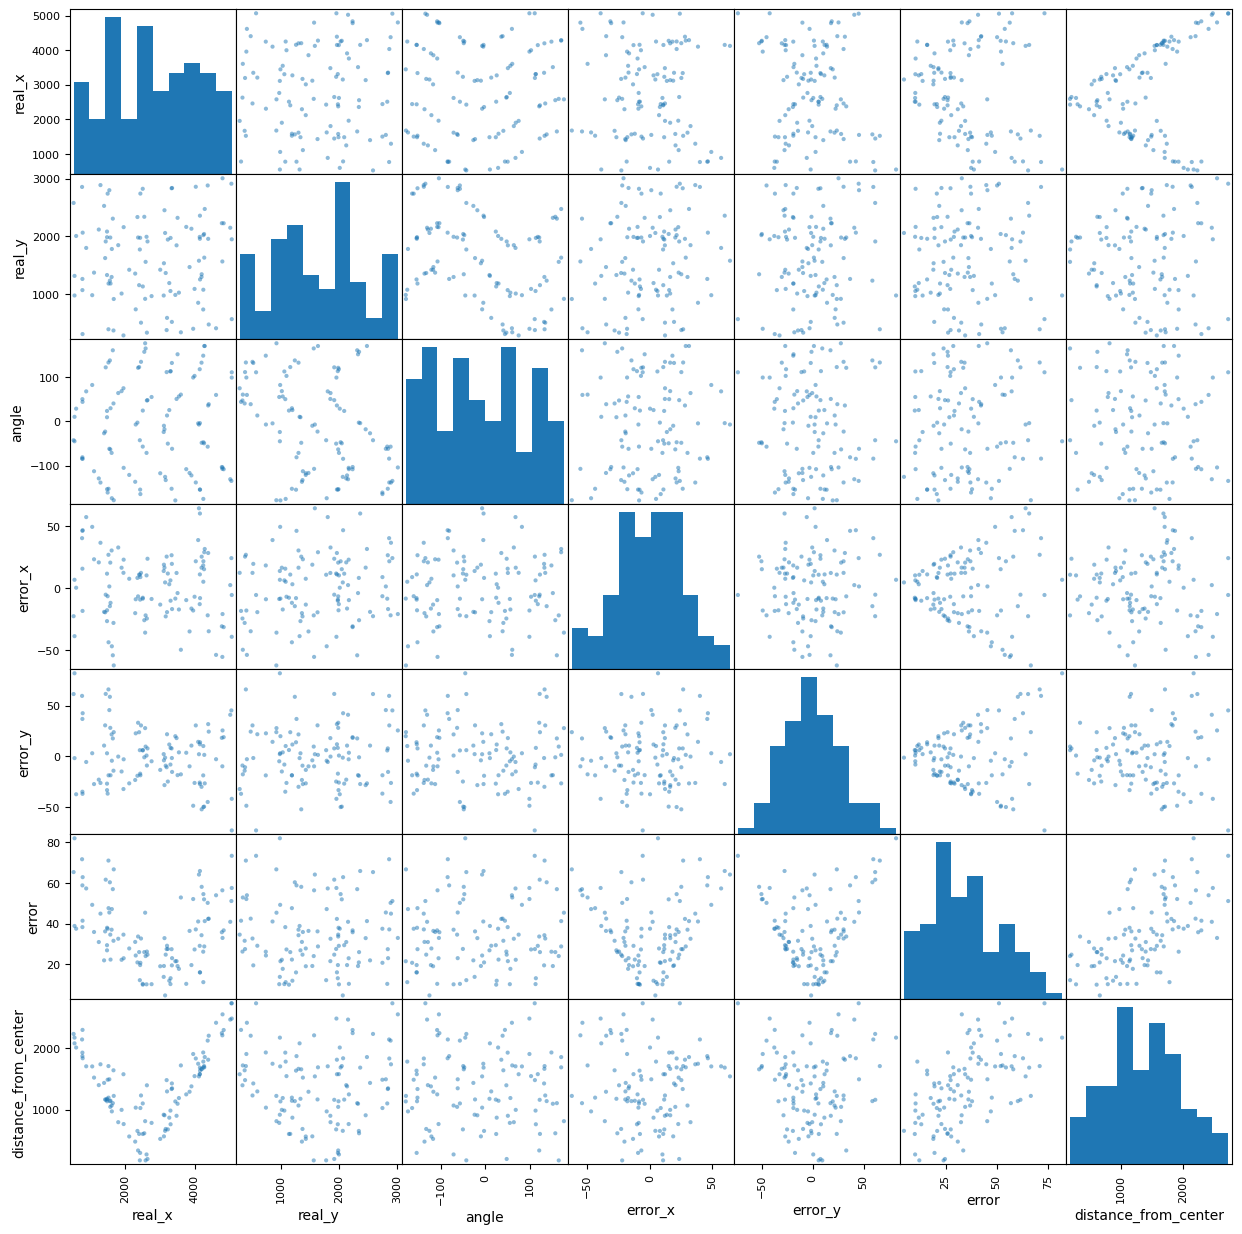

In [279]:
matrix_plot=pd.plotting.scatter_matrix(df_error[['real_x', 'real_y', 'angle','error_x', 'error_y', 'error', 'distance_from_center']],figsize=(15,15))

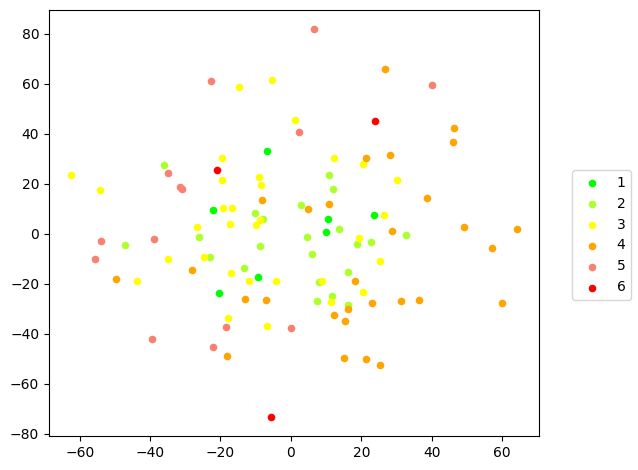

In [280]:
x_axis=df_error['error_x']
y_axis=df_error['error_y']
group = df_error['distance_from_center_discrete']
d_colors = {1:'lime', 2:'greenyellow', 3:'yellow', 4:'orange', 5:'salmon', 6:'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(df_error['error_x'][df_error['distance_from_center_discrete']==g], df_error['error_y'][df_error['distance_from_center_discrete']==g], c = d_colors[g], label = g, s = 20)
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)

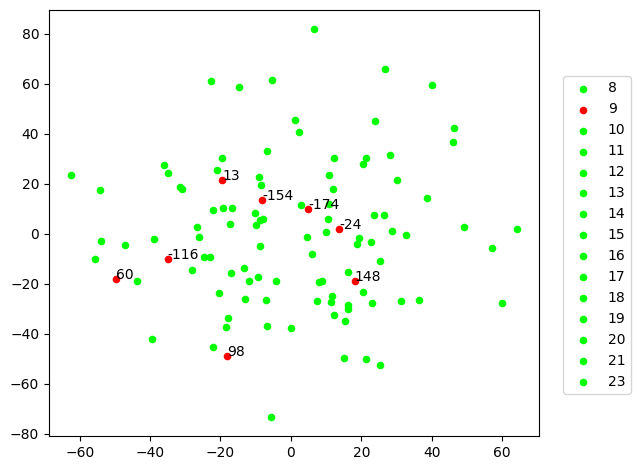

In [282]:
x_axis=df_error['error_x']
y_axis=df_error['error_y']
group = df_error['target_aruco']
d_colors = {8:'lime', 9:'lime', 10:'lime', 11:'lime', 12:'lime', 13:'lime', 14:'lime', 15:'lime', 16:'lime', 17:'lime', 18:'lime', 19:'lime', 20:'lime', 21:'lime', 23:'lime'}
aruco_to_observe=9

d_colors[aruco_to_observe]='red'
fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(df_error['error_x'][df_error['target_aruco']==g], df_error['error_y'][df_error['target_aruco']==g], c = d_colors[g], label = g, s = 20)
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.85)
for i, txt in enumerate(df_error['angle'][df_error['target_aruco']==aruco_to_observe]):
    ax.annotate(int(txt), (df_error['error_x'][df_error['target_aruco']==aruco_to_observe].iloc[i], df_error['error_y'][df_error['target_aruco']==aruco_to_observe].iloc[i]))
plt.show()

In [283]:
import numpy as np
from scipy.optimize import minimize

def model(params, X):
    # here you need to implement your real model
    # for Predicted_Installation
    a,a1,b,c,c1,d= params
    l_carriage_pred=[]
    for row in X:
        target=row[:2]
        angle=row[2]
        carriage_pred = calib.predict_carriage_position_in_image_plane(target, angle, (9.081e-01, 3.440e+00,  2.902e-02,  1.117e+00,  9.292e+00))
        l_carriage_pred.append(carriage_pred)
    y_pred=np.array(l_carriage_pred)
    y_pred[:,0]=y_pred[:,0]+a*(np.abs(b-y_pred[:,0]))+a1*(np.abs(b-y_pred[:,0]))**2
    y_pred[:,1]=y_pred[:,1]+c*(np.abs(d-y_pred[:,1]))+c1*(np.abs(d-y_pred[:,1]))**2
    return y_pred

def sum_of_squares(params, X, Y):
    y_pred = model(params, X)
    obj = np.sqrt(((y_pred - Y) ** 2).sum())
    return obj

# generate some test data
X = x.values
Y = y.values

res = minimize(sum_of_squares, [0, 0, 0,0,0,0], args=(X, Y), tol=1e-3, method="Powell")
print(res)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 403.849449139521
       x: [ 4.316e-03 -2.278e-07 -2.382e+03 -6.281e-03  3.083e-07
           -7.253e+02]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-4.817e-04 -6.137e-08 ...  8.658e-08 -2.159e+02]]
    nfev: 259


In [284]:
y_pred=model(res['x'], X)
y_true=df[['carriage_x_undist','carriage_y_undist']].values

from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_true,y_pred,squared=False),r2_score(y_true,y_pred))

27.591384510260625 0.9990399627943969
